# 기본 함수 및 라이브러리 로드

In [1]:
# 경고 제어
import warnings
warnings.filterwarnings('ignore')

# 기본 전처리
import numpy as np
import geopandas as gpd
import pandas as pd
pd.set_option('display.max_columns', 150)
pd.set_option('display.width', 10000)
pd.options.display.float_format = '{:.4f}'.format

# 시각화
import folium
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.rcParams['figure.figsize'] = (12, 9)
from scipy.stats import norm

from scipy import stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

## 필요 함수 로드

In [2]:
def get_object_type(df):
    """ 
    상권코드의 type을 str로 바꿈
    상권_이름을 삭제
    """
    
    df['상권_코드'] = df['상권_코드'].apply(lambda x: str(x))
    try:
        df.drop('상권_이름', inplace=True, axis=1)
    except:
        pass
    return df

In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
### Scaler들의 함수를 정의함 ###
def get_Standard(df_x):
    s_scaler = StandardScaler()
    return s_scaler.fit_transform(np.array(df_x).reshape(-1, 1))

def get_MinMaxScaler(df_x):
    m_scaler = MinMaxScaler()
    return m_scaler.fit_transform(np.array(df_x).reshape(-1, 1))

def get_Stan_log1p(df_x):
    s_scaler = StandardScaler()
    return s_scaler.fit_transform(np.array(df_x.agg(np.log1p)).reshape(-1, 1))

def get_log1p(df_x):
    return df_x.agg(np.log1p)

## 검정 함수
### vif 관련 함수

##### AIC 시각화

In [4]:
def vis_AIC_step(result):
    fig = plt.figure(figsize=(10, 10))
    fig.set_facecolor('white')
    
    font_size = 15
    steps = range(1, result.shape[0]+1)
    AIC = result['AIC'].to_list()
    features = [f'step {i+1}\n' + '\n'.join(s) for i, s in enumerate(result['Features'])]
    
    plt.xticks(steps, features, fontsize=12)
    plt.plot(steps, AIC, marker='o')
    
    plt.ylabel('AIC', fontsize=font_size)
    plt.grid(True)
    plt.show()

### 최적화 함수

In [5]:
def get_best_summary_by_A(model):
    return model.sort_values('AIC').head(1)['SUMMARY'].iloc[0]

def get_best_feature_by_A(model):
    return model.sort_values('AIC').head(1)['Features'].iloc[0]

def get_adj_r_squared_by_A_model(model):
    summary = get_best_summary_by_A(model)
    return float(str(summary).split('Adj. R-squared:')[1].split('Method')[0])

### PCA 함수

In [6]:
from sklearn.decomposition import PCA

def decompo_pca(df, col, new_col):
    
    pca = PCA(n_components=1)
    df[new_col] = pca.fit_transform(df[col])
    df.drop(col, axis=1, inplace=True)
    
    return df

# Data Load

In [7]:
df_i3= pd.read_csv('../data/indicator/preprocess_cul.csv')
df_i3 = df_i3.set_index('상권_코드')
df_i3.head(3)

,리뷰_수,평균_별점,사장님_댓글_비율,맛있다_비율,친절_비율,분위기_비율,싸다_비율,비싸다_비율,F_유저_언급량,F_버즈_언급량,F_관람환경_매력도,F_먹거리_매력도,F_취향_매력도,F_맛_매력도,F_입소문_매력도,F_포토제닉_매력도,F_제품_단가,D_유저_언급량,D_버즈_언급량,D_관람환경_매력도,D_먹거리_매력도,D_취향_매력도,D_맛_매력도,D_입소문_매력도,D_포토제닉_매력도,D_제품_단가
상권_코드,,,,,,,,,,,,,,,,,,,,,,,,,,
1000001,1392.0000,4.4145,0.0812,0.9620,1.0037,1.3616,0.6327,1.0253,2.7458,3.2419,2.9265,2.9458,3.3263,-0.3154,-0.2962,0.0844,28156.3910,2.2927,3.3450,2.8440,2.7547,3.1277,-0.5010,-0.5903,-0.2173,9324.6218
1000002,424.0000,4.1981,0.0024,0.9209,0.8238,0.6050,0.3077,0.6556,2.7458,3.2419,2.9265,2.9458,3.3263,-0.3154,-0.2962,0.0844,28156.3910,2.2927,3.3450,2.8440,2.7547,3.1277,-0.5010,-0.5903,-0.2173,9324.6218
1000003,6280.0000,4.3665,0.0621,1.0208,1.1733,1.4607,0.8519,1.1738,2.7458,3.2419,2.9265,2.9458,3.3263,-0.3154,-0.2962,0.0844,28156.3910,2.2927,3.3450,2.8440,2.7547,3.1277,-0.5010,-0.5903,-0.2173,9324.6218


In [8]:
df_X = df_i3.copy()
df_y = pd.read_csv('../data/base_data/target.csv', index_col='상권_코드')

# 1차 분석

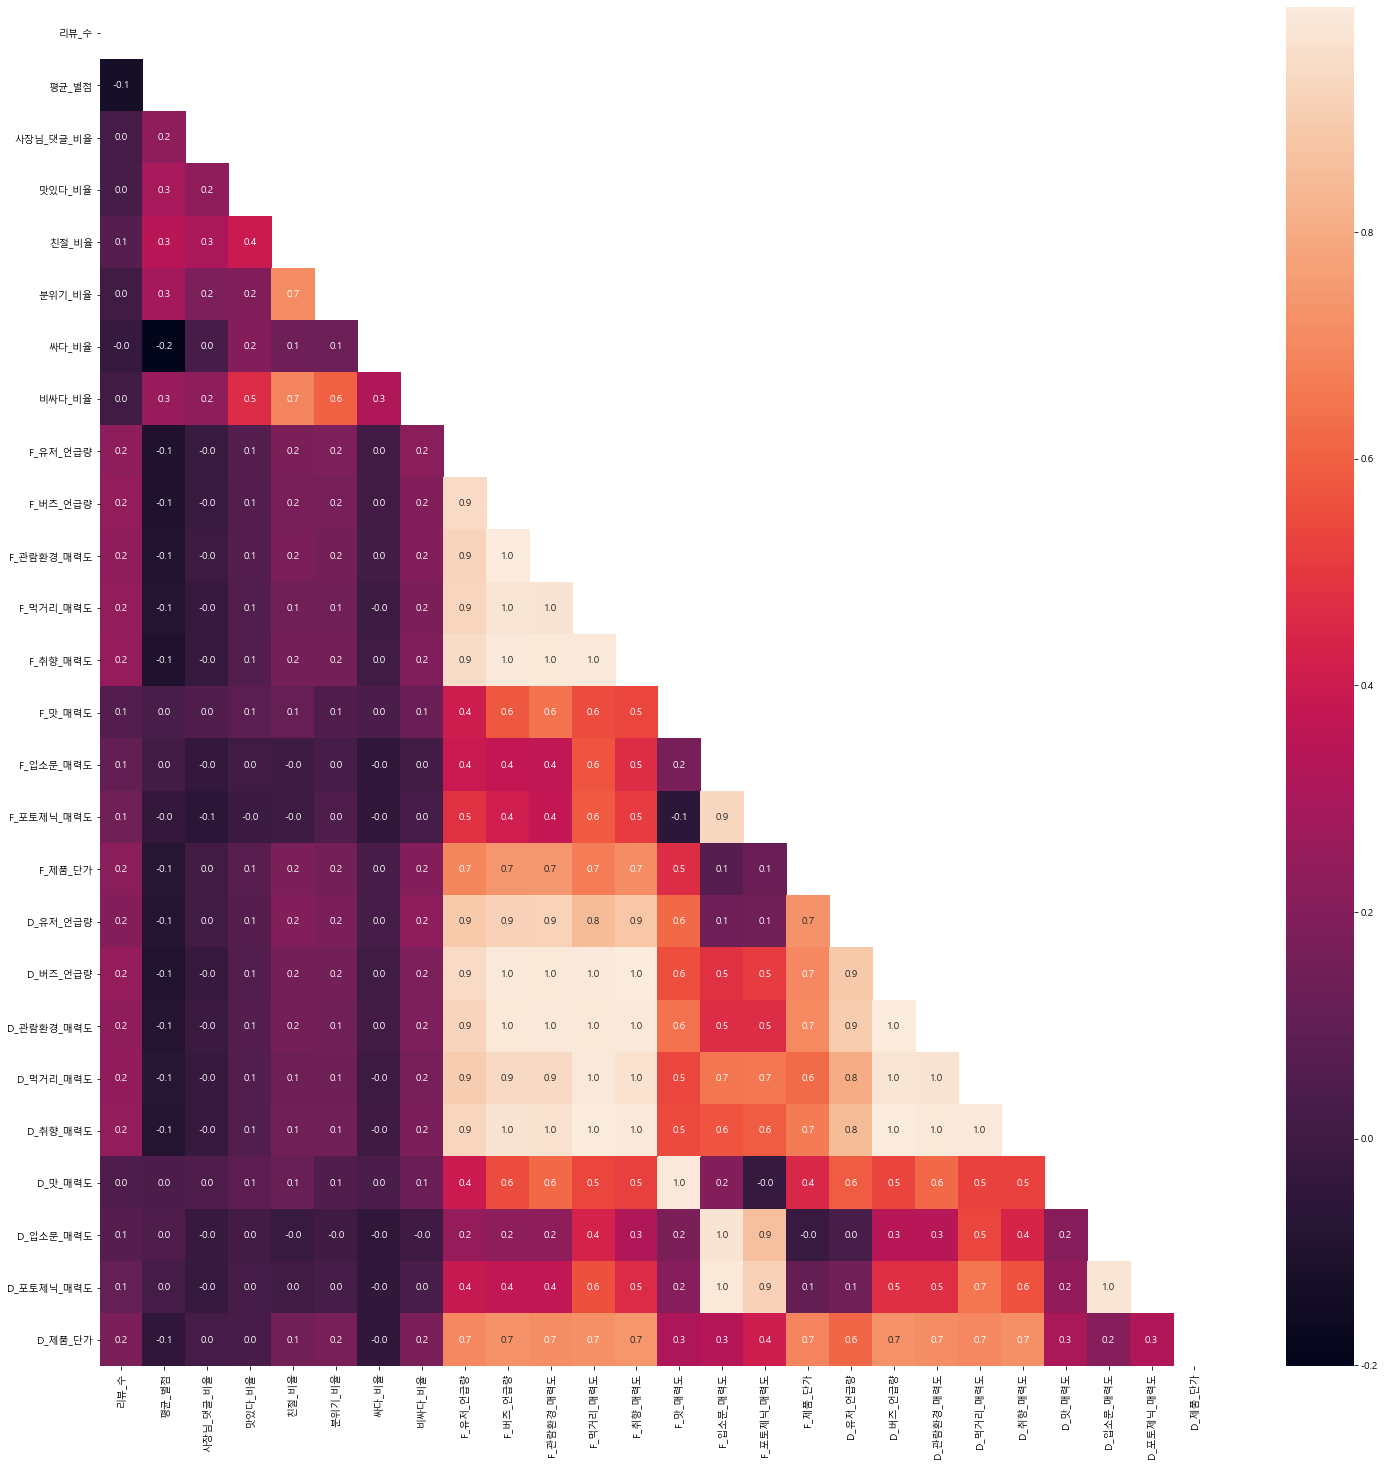

In [9]:
plt.figure(figsize=(25, 25))

mask = np.zeros_like(df_X.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df_X.corr(), mask=mask, fmt='.1f', annot=True);

In [10]:
model = sm.OLS(df_y, df_X)
regr = model.fit()
data = regr.summary()
data

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 면적당_매출   R-squared (uncentered):                   0.633
Model:                            OLS   Adj. R-squared (uncentered):              0.626
Method:                 Least Squares   F-statistic:                              85.31
Date:                Thu, 30 Dec 2021   Prob (F-statistic):                   4.39e-199
Time:                        12:59:38   Log-Likelihood:                         -15557.
No. Observations:                1009   AIC:                                  3.115e+04
Df Residuals:                     989   BIC:                                  3.125e+04
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
리뷰_수         165.1311     25.515      6.472      0.000     115.061     215.202
평균_별점       1.067e+05   1.93e+05      0.552      0.581   -2.73e+05    4.86e+05
사장님_댓글_비율   8.034e+04   3.08e+05      0.261      0.794   -5.24e+05    6.84e+05
맛있다_비율          1e+06   8.21e+05      1.218      0.223   -6.11e+05    2.61e+06
친절_비율       3073.6809   1.55e+05      0.020      0.984      -3e+05    3.07e+05
분위기_비율     -1.943e+05   9.56e+04     -2.033      0.042   -3.82e+05   -6732.630
싸다_비율       5.373e+04   4.52e+04      1.187      0.235   -3.51e+04    1.43e+05
비싸다_비율      1.875e+05   1.59e+05      1.179      0.239   -1.24e+05    4.99e+05
F_유저_언급량   -4.002e+05   2.96e+05     -1.352      0.177   -9.81e+05    1.81e+05
F_버즈_언급량    1.913e+06      1e+06      1.910      0.056   -5.24e+04    3.88e+06
F_관람환경_매력도 -1.612e+06   2.26e+06     -0.714      0.475   -6.04e+06    2.82e+06
F_먹거리_매력도  -1.318e+06    1.4e+06     -0.942      0.346   -4.06e+06    1.43e+06
F_취향_매력도    3.599e+06   1.39e+06      2.589      0.010    8.71e+05    6.33e+06
F_맛_매력도    -3.525e+06   3.11e+06     -1.132      0.258   -9.64e+06    2.59e+06
F_입소문_매력도  -3.231e+06   1.09e+06     -2.970      0.003   -5.37e+06    -1.1e+06
F_포토제닉_매력도  1.686e+06   1.98e+06      0.852      0.394    -2.2e+06    5.57e+06
F_제품_단가       -3.0546     26.460     -0.115      0.908     -54.980      48.871
D_유저_언급량    2.627e+05   2.92e+05      0.901      0.368   -3.09e+05    8.35e+05
D_버즈_언급량   -1.578e+06   6.11e+05     -2.583      0.010   -2.78e+06   -3.79e+05
D_관람환경_매력도   1.25e+06   1.57e+06      0.796      0.426   -1.83e+06    4.33e+06
D_먹거리_매력도   1.894e+06   1.45e+06      1.310      0.191   -9.43e+05    4.73e+06
D_취향_매력도   -3.557e+06   1.62e+06     -2.202      0.028   -6.73e+06   -3.87e+05
D_맛_매력도     2.828e+06   1.93e+06      1.469      0.142    -9.5e+05    6.61e+06
D_입소문_매력도   3.472e+06   1.37e+06      2.534      0.011    7.84e+05    6.16e+06
D_포토제닉_매력도 -1.979e+06   1.86e+06     -1.065      0.287   -5.63e+06    1.67e+06
D_제품_단가      -78.0884     73.638     -1.060      0.289    -222.593      66.417
==============================================================================
Omnibus:                      628.661   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9758.466
Skew:                           2.585   Prob(JB):                         0.00
Kurtosis:                      17.331   Cond. No.                     1.27e+16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenva

## PCA

In [11]:
cols = ['F_유저_언급량','F_버즈_언급량','F_관람환경_매력도','F_먹거리_매력도','F_취향_매력도']
df_X = decompo_pca(df_X, cols, 'food_SNS_언급량_pca')

cols = [ 'F_입소문_매력도', 'F_포토제닉_매력도']
df_X = decompo_pca(df_X, cols, 'food_입소문_포토제닉_pca')

cols = ['D_유저_언급량','D_버즈_언급량','D_관람환경_매력도','D_먹거리_매력도','D_취향_매력도']
df_X = decompo_pca(df_X, cols, 'dessert_SNS_언급량_pca')

cols = ['D_입소문_매력도', 'D_포토제닉_매력도']
df_X = decompo_pca(df_X, cols, 'dessert_입소문_포토제닉_pca')

cols = ['D_맛_매력도', 'F_맛_매력도']
df_X = decompo_pca(df_X, cols, '맛_매력도_pca')

cols = ['food_SNS_언급량_pca', 'dessert_SNS_언급량_pca']
df_X = decompo_pca(df_X, cols, 'SNS_언급량_pca')

cols = ['food_입소문_포토제닉_pca', 'dessert_입소문_포토제닉_pca']
df_X = decompo_pca(df_X, cols, '입소문_포토제닉_pca')

df_X.head()

,리뷰_수,평균_별점,사장님_댓글_비율,맛있다_비율,친절_비율,분위기_비율,싸다_비율,비싸다_비율,F_제품_단가,D_제품_단가,맛_매력도_pca,SNS_언급량_pca,입소문_포토제닉_pca
상권_코드,,,,,,,,,,,,,
1000001,1392.0000,4.4145,0.0812,0.9620,1.0037,1.3616,0.6327,1.0253,28156.3910,9324.6218,-0.6147,6.0837,-0.6280
1000002,424.0000,4.1981,0.0024,0.9209,0.8238,0.6050,0.3077,0.6556,28156.3910,9324.6218,-0.6147,6.0837,-0.6280
1000003,6280.0000,4.3665,0.0621,1.0208,1.1733,1.4607,0.8519,1.1738,28156.3910,9324.6218,-0.6147,6.0837,-0.6280
1000004,1951.0000,4.2373,0.0159,0.9766,0.6351,0.8400,0.8945,0.9288,28156.3910,9324.6218,-0.6147,6.0837,-0.6280
1000005,5527.0000,4.4255,0.0655,1.0013,1.0292,1.4835,0.8823,1.0803,28156.3910,9324.6218,-0.6147,6.0837,-0.6280


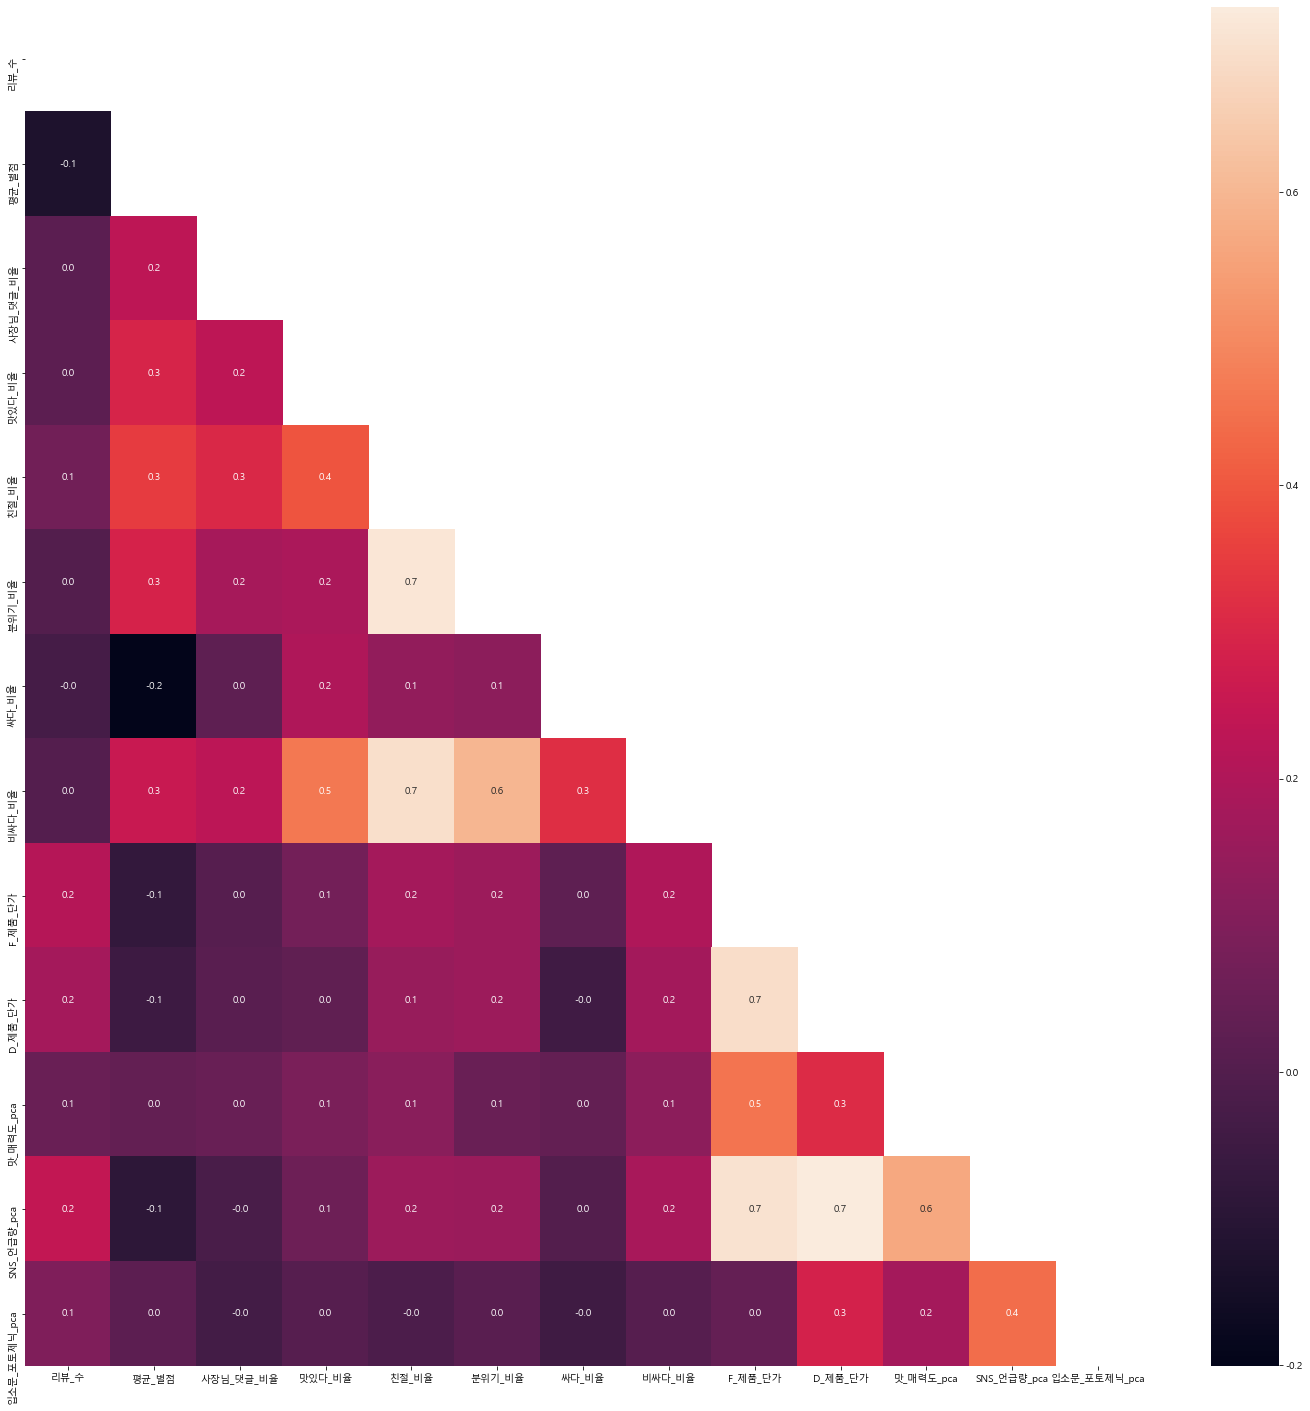

In [12]:
plt.figure(figsize=(25, 25))

mask = np.zeros_like(df_X.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df_X.corr(), mask=mask, fmt='.1f', annot=True);

In [13]:
model = sm.OLS(df_y, df_X)
regr = model.fit()
data = regr.summary()
data

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 면적당_매출   R-squared (uncentered):                   0.626
Model:                            OLS   Adj. R-squared (uncentered):              0.621
Method:                 Least Squares   F-statistic:                              128.4
Date:                Thu, 30 Dec 2021   Prob (F-statistic):                   2.51e-202
Time:                        12:59:39   Log-Likelihood:                         -15566.
No. Observations:                1009   AIC:                                  3.116e+04
Df Residuals:                     996   BIC:                                  3.122e+04
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
리뷰_수           167.6140     25.535      6.564      0.000     117.506     217.722
평균_별점         2.628e+04   1.91e+05      0.138      0.891   -3.48e+05    4.01e+05
사장님_댓글_비율     3.533e+04   3.07e+05      0.115      0.908   -5.66e+05    6.37e+05
맛있다_비율        7.984e+05   8.21e+05      0.972      0.331   -8.13e+05    2.41e+06
친절_비율         4.579e+04   1.54e+05      0.297      0.766   -2.57e+05    3.48e+05
분위기_비율        -2.05e+05   9.59e+04     -2.137      0.033   -3.93e+05   -1.68e+04
싸다_비율         4.378e+04    4.5e+04      0.973      0.331   -4.45e+04    1.32e+05
비싸다_비율        2.439e+05   1.55e+05      1.569      0.117   -6.11e+04    5.49e+05
F_제품_단가         31.4163     19.184      1.638      0.102      -6.229      69.061
D_제품_단가        -71.1193     68.082     -1.045      0.296    -204.720      62.481
맛_매력도_pca     3.333e+05   2.14e+05      1.560      0.119    -8.6e+04    7.52e+05
SNS_언급량_pca   4.234e+04   1.93e+04      2.191      0.029    4422.621    8.03e+04
입소문_포토제닉_pca -1.985e+05   9.09e+04     -2.184      0.029   -3.77e+05   -2.02e+04
==============================================================================
Omnibus:                      625.270   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9491.726
Skew:                           2.574   Prob(JB):                         0.00
Kurtosis:                      17.116   Cond. No.                     6.00e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large,  6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
path = '../data/indicator/fs_cul.csv'
df_X.to_csv(path)
pd.read_csv(path).head()

,상권_코드,리뷰_수,평균_별점,사장님_댓글_비율,맛있다_비율,친절_비율,분위기_비율,싸다_비율,비싸다_비율,F_제품_단가,D_제품_단가,맛_매력도_pca,SNS_언급량_pca,입소문_포토제닉_pca
0,1000001,1392.0000,4.4145,0.0812,0.9620,1.0037,1.3616,0.6327,1.0253,28156.3910,9324.6218,-0.6147,6.0837,-0.6280
1,1000002,424.0000,4.1981,0.0024,0.9209,0.8238,0.6050,0.3077,0.6556,28156.3910,9324.6218,-0.6147,6.0837,-0.6280
2,1000003,6280.0000,4.3665,0.0621,1.0208,1.1733,1.4607,0.8519,1.1738,28156.3910,9324.6218,-0.6147,6.0837,-0.6280
3,1000004,1951.0000,4.2373,0.0159,0.9766,0.6351,0.8400,0.8945,0.9288,28156.3910,9324.6218,-0.6147,6.0837,-0.6280
4,1000005,5527.0000,4.4255,0.0655,1.0013,1.0292,1.4835,0.8823,1.0803,28156.3910,9324.6218,-0.6147,6.0837,-0.6280


# 정규화

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
cols = df_X.columns
for col in cols:
    df_X[col] = scaler.fit_transform(np.array(df_X[col]).reshape(-1, 1))
    
df_X.describe()

,리뷰_수,평균_별점,사장님_댓글_비율,맛있다_비율,친절_비율,분위기_비율,싸다_비율,비싸다_비율,F_제품_단가,D_제품_단가,맛_매력도_pca,SNS_언급량_pca,입소문_포토제닉_pca
count,1009.0000,1009.0000,1009.0000,1009.0000,1009.0000,1009.0000,1009.0000,1009.0000,1009.0000,1009.0000,1009.0000,1009.0000,1009.0000
mean,0.1001,0.7044,0.0803,0.6528,0.3204,0.2578,0.0637,0.2993,0.4881,0.5634,0.4482,0.2076,0.2432
std,0.1347,0.1056,0.1340,0.1183,0.1411,0.1561,0.0582,0.1145,0.2337,0.2589,0.1676,0.2830,0.2012
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.0178,0.6493,0.0000,0.5921,0.2314,0.1567,0.0408,0.2269,0.3021,0.4356,0.4018,0.0463,0.1791
50%,0.0517,0.7031,0.0312,0.6588,0.3025,0.2227,0.0578,0.2891,0.4364,0.5506,0.4221,0.0748,0.2100
75%,0.1223,0.7600,0.0994,0.7257,0.3882,0.3217,0.0744,0.3522,0.7092,0.7620,0.4464,0.1995,0.2362
max,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


# 점수 지수화

In [16]:
i3_df = pd.DataFrame(columns=['i3_ind1'], index=df_X.index)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

lr = LinearRegression()
model = lr.fit(df_X, df_y)
coef = model.coef_.reshape(-1)

scaler = MinMaxScaler()
coef_df = np.array((df_X * coef).sum(axis=1))
i3_indi = scaler.fit_transform(coef_df.reshape(-1, 1))
i3_df['i3_ind1'] = i3_indi.reshape(-1)

i3_df.head()

,i3_ind1
상권_코드,
1000001,0.3632
1000002,0.3226
1000003,0.6228
1000004,0.4160
1000005,0.5710


# 최종 폴더 저장

In [18]:
i3_df.to_csv('../data/indicator/indicator_i3.csv')
pd.read_csv('../data/indicator/indicator_i3.csv').head()

,상권_코드,i3_ind1
0,1000001,0.3632
1,1000002,0.3226
2,1000003,0.6228
3,1000004,0.4160
4,1000005,0.5710


In [19]:
i3_df['i3_ind1'].sum()

347.991773261083